In [202]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy
import glob

from make_stds_b00 import *
import scipy.stats as stats
import scipy.signal as signal

import tempmatch as tm

In [2]:

def read_csvs_convert_to_dataframe(csv_paths):
    """
    reads a list of csv file locations and returns them
    as a pandas dataframe
    """
    df = pd.DataFrame()
    for f in csv_paths:
        try:
            df = pd.concat([df, pd.read_csv(f)])
        except:
            pass
        
    return df

In [3]:
filelocs = !ls /media/sda/data/robdata/stds/

In [4]:
filelocs = ['/media/sda/data/robdata/stds/'+f for f in filelocs]

In [5]:
filelocs[0:3]

['/media/sda/data/robdata/stds/std_2019_121.csv',
 '/media/sda/data/robdata/stds/std_2019_122.csv',
 '/media/sda/data/robdata/stds/std_2019_123.csv']

In [6]:
cols = ['h0', 'h1', 'h2', 'h3', 'h4', 'h5']

df = read_csvs_convert_to_dataframe(filelocs)
df.columns = ['time', 'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'day', 'year']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['sum'] = df[cols].sum(axis=1)
df['cumsum'] = df['sum'].cumsum()
df['x'] = np.arange(0, df.shape[0], 1)

In [7]:
detectfiles = !ls /media/sda/data/borehole/detections/*.csv


In [8]:
bubble = read_csvs_convert_to_dataframe(detectfiles)
bubble['time'] = pd.to_datetime(bubble['time'])
bubble.sort_values(by='time', inplace=True)
bubble['ones'] = 1
bubble.set_index('time', inplace=True)

In [9]:
df

,h0,h1,h2,h3,h4,h5,day,year,sum,cumsum,x
time,,,,,,,,,,,
2019-05-01 09:12:35.998000+00:00,2009.982514,1896.698750,2644.556533,2231.117187,3171.070264,3320.807439,121,2019,15274.232688,1.527423e+04,0
2019-05-01 09:13:35.998000+00:00,2244.115614,2208.718859,3188.296086,2266.067675,3389.204666,3694.810375,121,2019,16991.213276,3.226545e+04,1
2019-05-01 09:14:35.998000+00:00,2405.323583,2444.787803,3290.745950,2531.706010,3681.038168,3975.563385,121,2019,18329.164899,5.059461e+04,2
2019-05-01 09:15:35.998000+00:00,1763.070465,1821.704596,2393.693282,1861.181321,2762.133815,2948.052832,121,2019,13549.836311,6.414445e+04,3
2019-05-01 09:16:35.998000+00:00,1679.733815,1594.719958,2155.377744,1575.671088,2394.219179,2580.010873,121,2019,11979.732658,7.612418e+04,4
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03 12:14:00.614000+00:00,410.210094,354.770982,664.639933,127.771182,245.686272,618.295955,34,2020,2421.374416,9.302942e+08,400172
2020-02-03 12:15:00.614000+00:00,671.610983,702.853178,1219.216594,190.575904,460.510525,1119.820931,34,2020,4364.588115,9.302986e+08,400173
2020-02-03 12:16:00.614000+00:00,677.540161,721.155286,889.745789,153.554086,327.923312,825.659284,34,2020,3595.577919,9.303022e+08,400174


In [10]:
bubble

,similarity,template_id,ones
time,,,
2019-05-07 16:37:35.302001+00:00,0.800337,0,1
2019-05-17 00:56:44.213000+00:00,0.801590,0,1
2019-05-18 11:45:45.948000+00:00,0.948577,0,1
2019-05-18 11:47:16.325000+00:00,0.962242,0,1
2019-05-18 11:47:54.450000+00:00,0.964003,0,1
...,...,...,...
2020-02-02 05:41:40.738000+00:00,0.811049,0,1
2020-02-02 08:03:25.875000+00:00,0.804105,0,1
2020-02-02 12:32:29.838000+00:00,0.810579,0,1


<AxesSubplot:xlabel='time'>

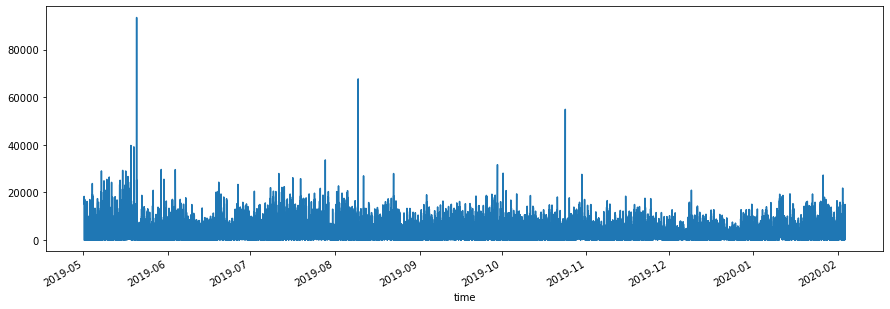

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))

df['sum'].plot(ax=ax)
# ax.set_yscale('log')

<AxesSubplot:xlabel='time'>

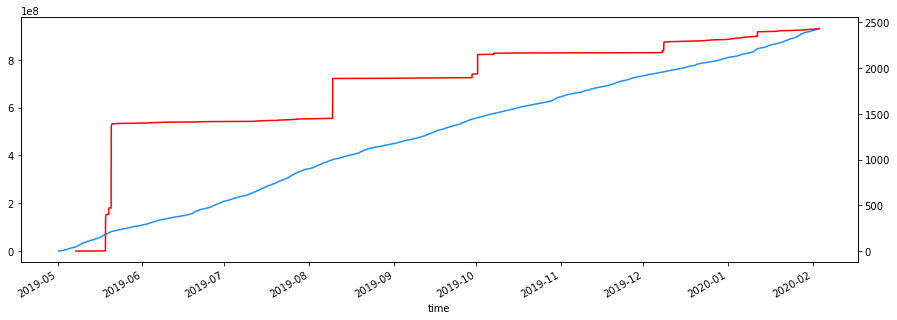

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))

df['cumsum'].plot(ax=ax, color='dodgerblue')
ax2 = ax.twinx()
bubble.ones.cumsum().plot(ax=ax2, color='red')
# ax.set_yscale('log')

In [67]:
df.shape

(400177, 11)

<AxesSubplot:xlabel='time'>

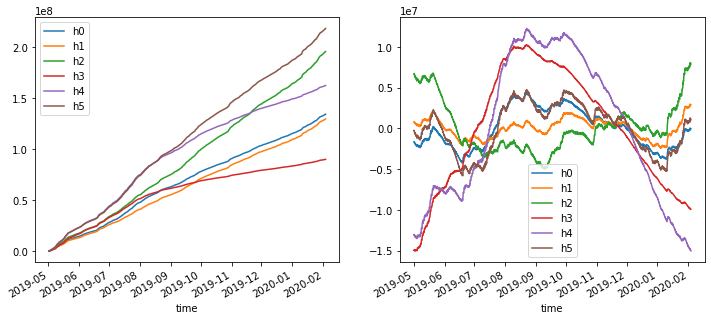

In [254]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df[cols].cumsum().plot(ax=ax[0])

df[cols].cumsum().apply(signal.detrend).plot(ax=ax[1])

<AxesSubplot:xlabel='time'>

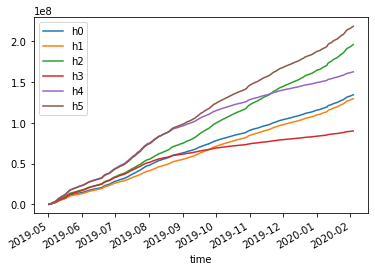

In [248]:
df[cols].cumsum().plot()

<AxesSubplot:xlabel='time'>

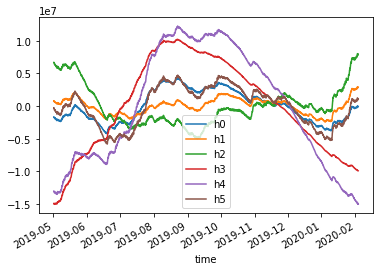

In [251]:
df[cols].cumsum().apply(signal.detrend).plot()

In [250]:
df

,h0,h1,h2,h3,h4,h5,day,year,sum,cumsum,x
time,,,,,,,,,,,
2019-05-01 09:12:35.998000+00:00,2009.982514,1896.698750,2644.556533,2231.117187,3171.070264,3320.807439,121,2019,15274.232688,1.527423e+04,0
2019-05-01 09:13:35.998000+00:00,2244.115614,2208.718859,3188.296086,2266.067675,3389.204666,3694.810375,121,2019,16991.213276,3.226545e+04,1
2019-05-01 09:14:35.998000+00:00,2405.323583,2444.787803,3290.745950,2531.706010,3681.038168,3975.563385,121,2019,18329.164899,5.059461e+04,2
2019-05-01 09:15:35.998000+00:00,1763.070465,1821.704596,2393.693282,1861.181321,2762.133815,2948.052832,121,2019,13549.836311,6.414445e+04,3
2019-05-01 09:16:35.998000+00:00,1679.733815,1594.719958,2155.377744,1575.671088,2394.219179,2580.010873,121,2019,11979.732658,7.612418e+04,4
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03 12:14:00.614000+00:00,410.210094,354.770982,664.639933,127.771182,245.686272,618.295955,34,2020,2421.374416,9.302942e+08,400172
2020-02-03 12:15:00.614000+00:00,671.610983,702.853178,1219.216594,190.575904,460.510525,1119.820931,34,2020,4364.588115,9.302986e+08,400173
2020-02-03 12:16:00.614000+00:00,677.540161,721.155286,889.745789,153.554086,327.923312,825.659284,34,2020,3595.577919,9.303022e+08,400174


In [114]:
linregressdf = pd.DataFrame(df[:-35000].resample('12H').apply(lambda x: stats.linregress(x['x'].values, x['cumsum'].values).slope), columns=['slope',])
linregressdf

,slope
time,
2019-05-01 00:00:00+00:00,211.993155
2019-05-01 12:00:00+00:00,938.848524
2019-05-02 00:00:00+00:00,2232.925985
2019-05-02 12:00:00+00:00,1193.369173
2019-05-03 00:00:00+00:00,1981.385027
...,...
2020-01-07 12:00:00+00:00,1139.140244
2020-01-08 00:00:00+00:00,1561.323328
2020-01-08 12:00:00+00:00,2320.487045


In [ ]:
polydf = pd.DataFrame(df.resample('12H').apply(lambda x: np.polyfit(x['x'], x['cumsum'], deg=2)[0]), columns=('p2',))
polydf['p1'] = df.resample('12H').apply(lambda x: np.polyfit(x['x'], x['cumsum'], deg=2)[1])
polydf['p0'] = df.resample('12H').apply(lambda x: np.polyfit(x['x'], x['cumsum'], deg=2)[2])
polydf

In [178]:
linregressdf.mean()[0]

2293.2874464895863

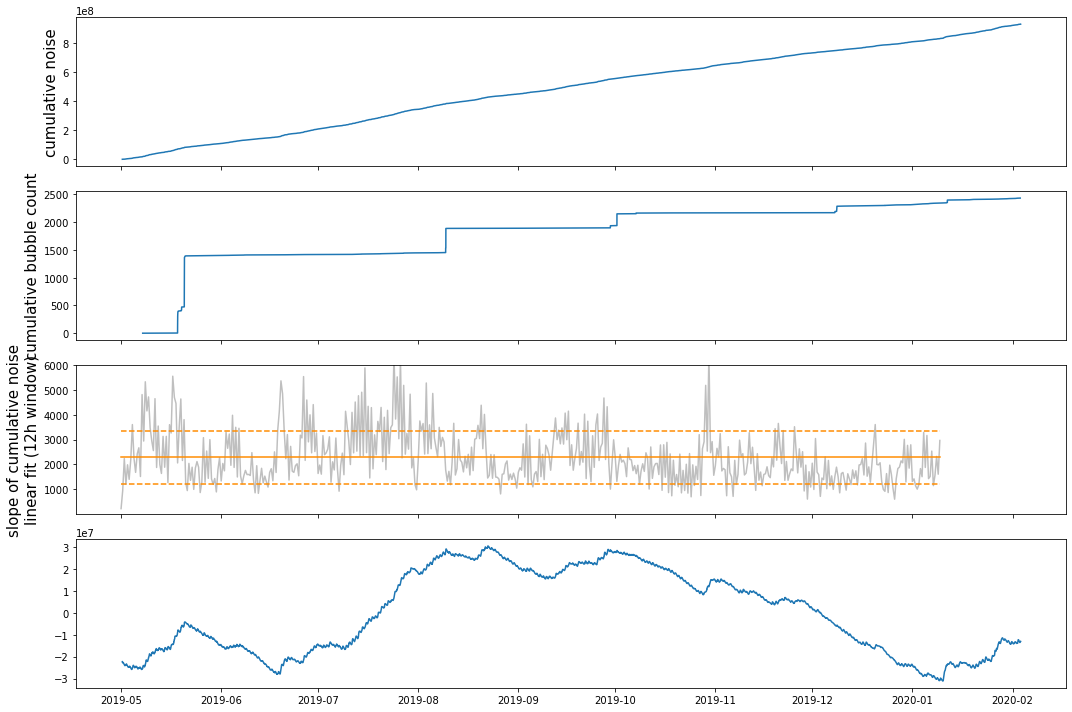

In [201]:
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(15, 10))

x = df['cumsum'].index
y = df['cumsum'].values
ax[0].plot(x, y)

x = bubble.ones.cumsum().index
y = bubble.ones.cumsum().values
ax[1].plot(x, y)

x = linregressdf.index
y = linregressdf['slope'].values
ax[2].plot(x, y, color='black', alpha=0.25)
# ax[2].set_yscale('log')
ax[2].set_ylim(1e0, 6e3)
ax[2].plot([linregressdf.index.min(), linregressdf.index.max()]
          ,[linregressdf.mean()[0], linregressdf.mean()[0]]
          ,color='darkorange')
ax[2].plot([linregressdf.index.min(), linregressdf.index.max()]
          ,[linregressdf.mean()[0]-linregressdf.std()[0]
            , linregressdf.mean()[0]-linregressdf.std()[0]]
          ,color='darkorange', linestyle='--')
ax[2].plot([linregressdf.index.min(), linregressdf.index.max()]
          ,[linregressdf.mean()[0]+linregressdf.std()[0]
            , linregressdf.mean()[0]+linregressdf.std()[0]]
          ,color='darkorange', linestyle='--')

ax[0].set_ylabel('cumulative noise', fontsize=15)
ax[1].set_ylabel('cumulative bubble count', fontsize=15)
ax[2].set_ylabel('slope of cumulative noise\nlinear fit (12h window)', fontsize=15)

ax[3].plot(df.index, signal.detrend(df['cumsum']))

# ax[3].plot(polydf.index, polydf.p2)
# ax[3].set_ylim(-15, 15)

# ax[4].plot(polydf.index, polydf.p1)
# ax[4].set_ylim(1e-20, 1e20)
# ax[4].set_yscale('log')

fig.tight_layout()

In [239]:
data =        tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.263')
data = data + tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.263')
data = data + tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.263')
data = data + tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.263')
data = data + tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.263')
data = data + tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.263')
data.filter(freqmin=5.0, freqmax=10.0, type='bandpass')

6 Trace(s) in Stream:
7F.B00.01.GDH | 2019-09-20T00:00:02.155001Z - 2019-09-21T00:00:03.290001Z | 1000.0 Hz, 86401136 samples
7F.B00.02.GDH | 2019-09-20T00:00:02.193001Z - 2019-09-21T00:00:00.181001Z | 1000.0 Hz, 86397989 samples
7F.B00.03.GDH | 2019-09-20T00:00:00.482001Z - 2019-09-21T00:00:01.831001Z | 1000.0 Hz, 86401350 samples
7F.B00.04.GDH | 2019-09-20T00:00:00.384001Z - 2019-09-21T00:00:01.439001Z | 1000.0 Hz, 86401056 samples
7F.B00.05.GDH | 2019-09-20T00:00:00.253001Z - 2019-09-21T00:00:00.370001Z | 1000.0 Hz, 86400118 samples
7F.B00.06.GDH | 2019-09-20T00:00:00.102001Z - 2019-09-21T00:00:02.096001Z | 1000.0 Hz, 86401995 samples

In [240]:
data.std()

[3.2207958764238179e-05,
 2.5654035362129619e-05,
 2.7629689212279363e-05,
 3.0111599246306277e-05,
 3.1686642588744898e-05,
 2.9146397712766629e-05]

In [256]:
data_minus_std = data.copy()

for d,s in zip(data_minus_std, data.std()):
    d.data

/tmp/ipykernel_9442/195182698.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data - np.array(data.std())


TypeError: unsupported operand type(s) for -: 'Trace' and 'float'

In [ ]:
_ = data.plot()

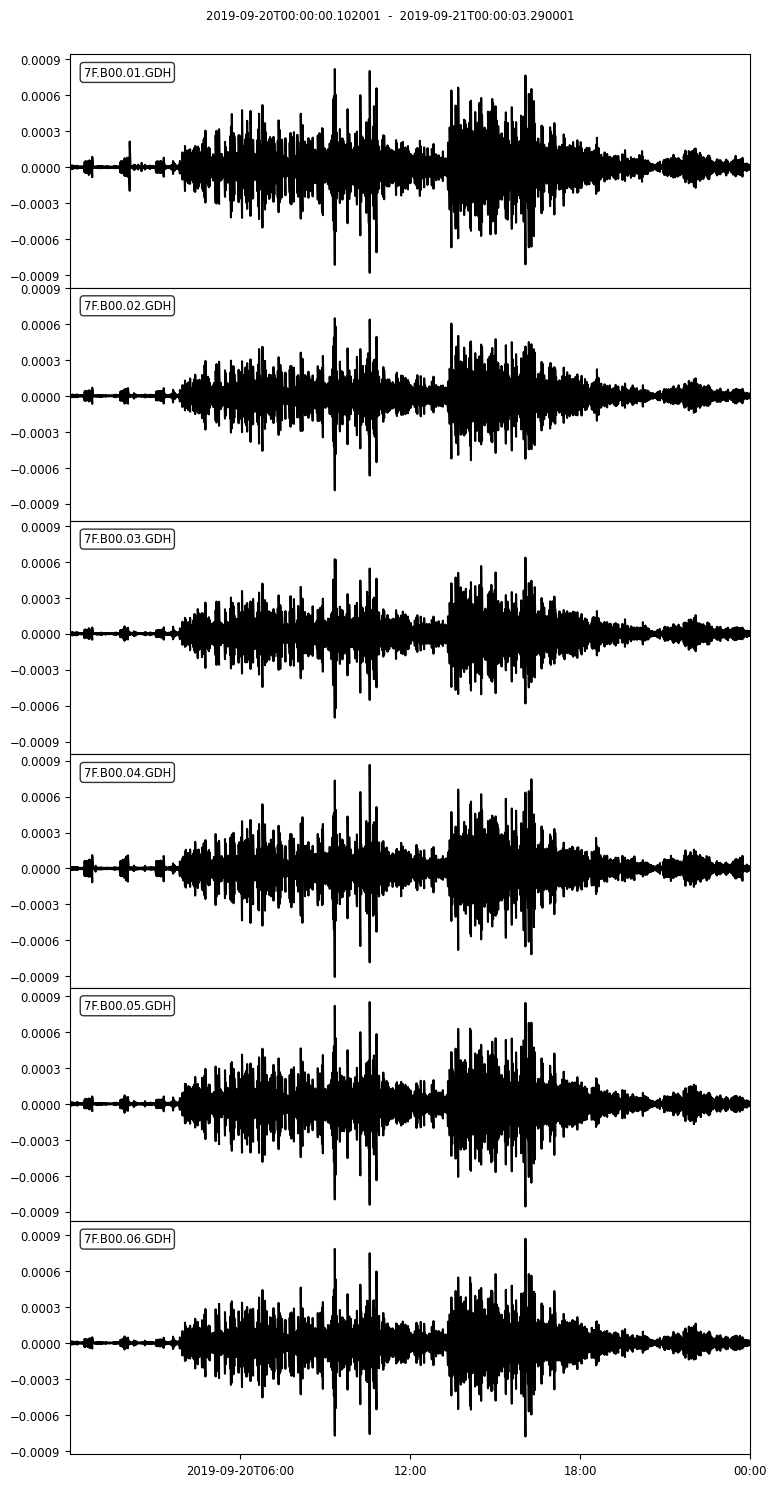

In [241]:
_ = data.plot()

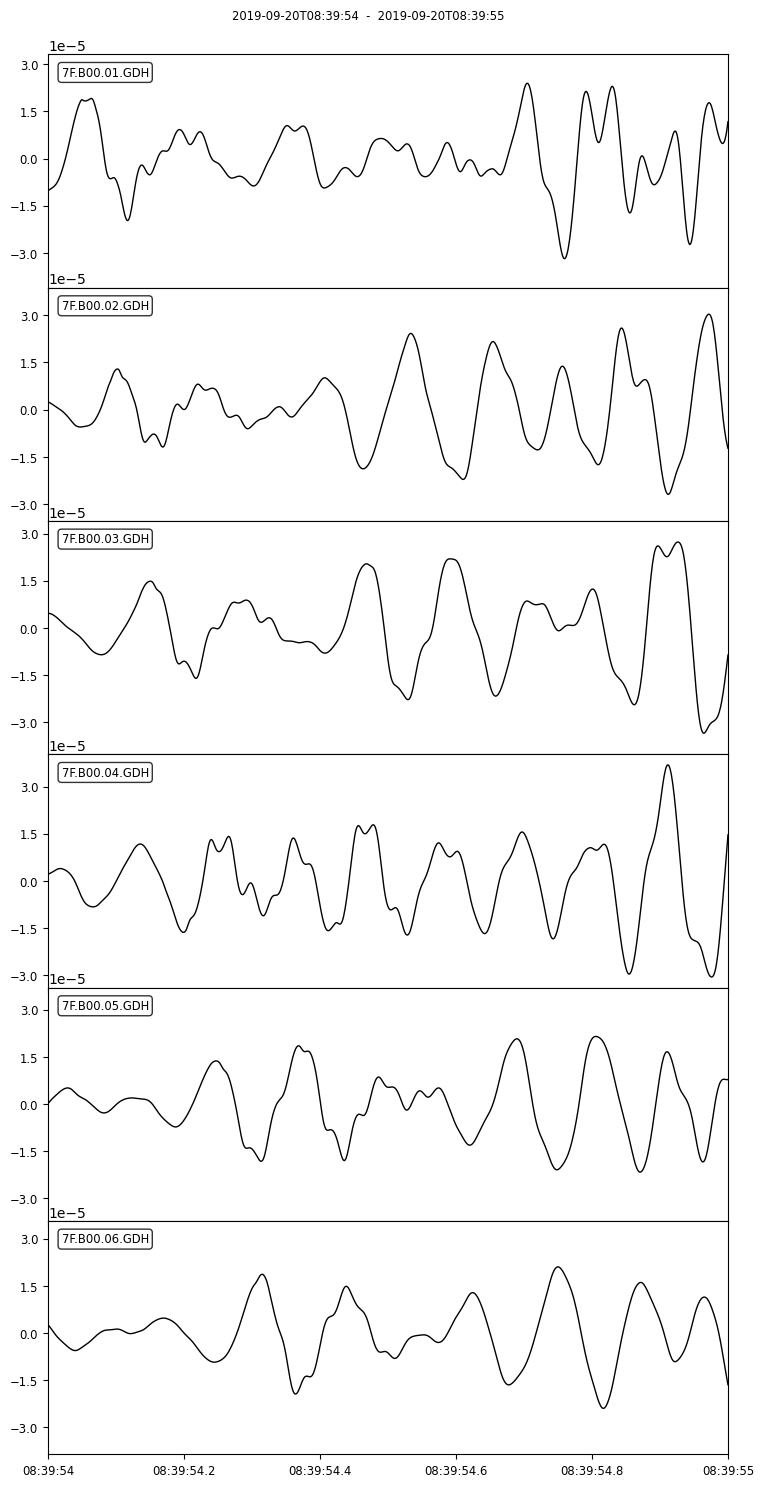

In [242]:
_ = data.plot(starttime=obspy.UTCDateTime('2019-09-20T08:39:54.0'), endtime=obspy.UTCDateTime('2019-09-20T08:39:55.0'))

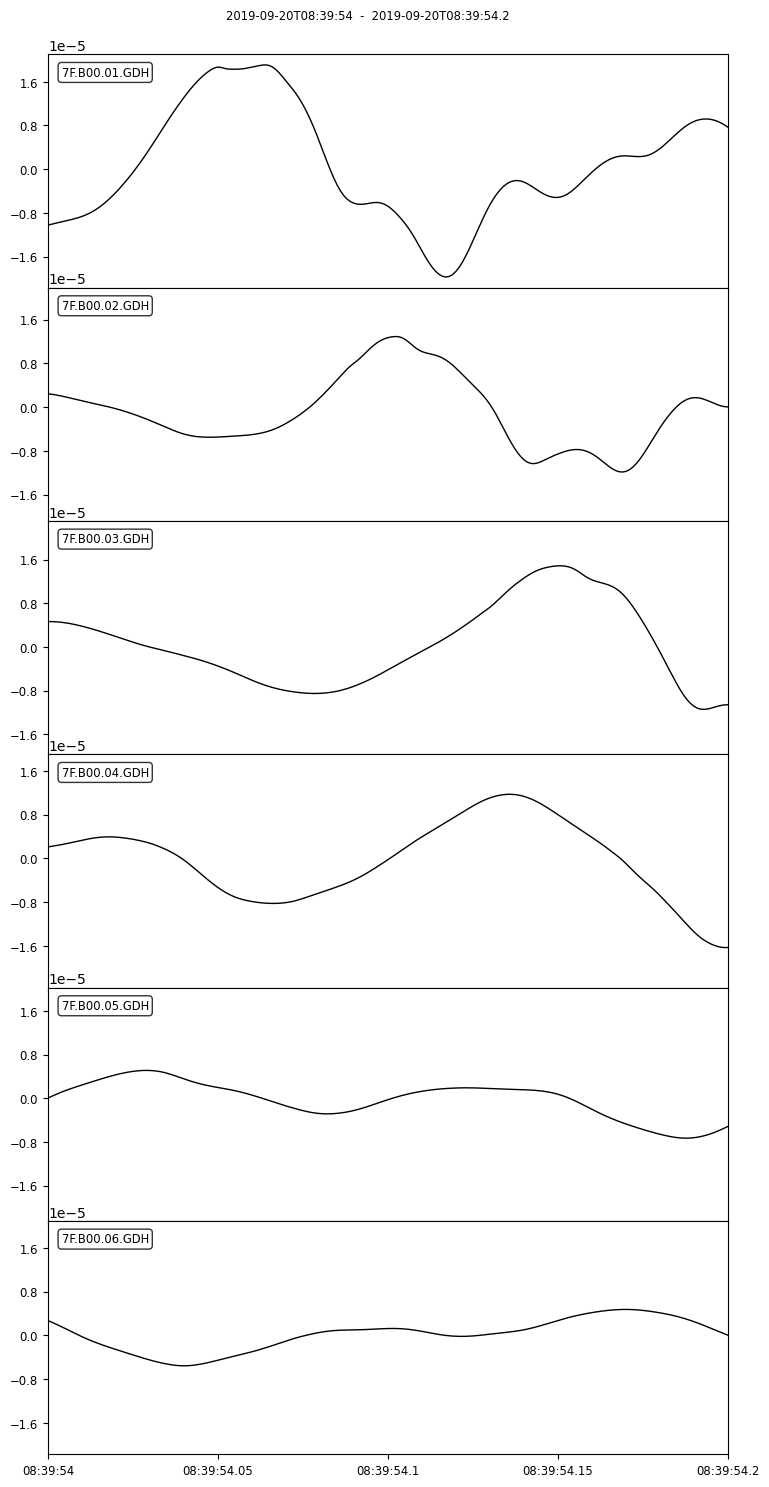

In [243]:
_ = data.plot(starttime=obspy.UTCDateTime('2019-09-20T08:39:54.0'), endtime=obspy.UTCDateTime('2019-09-20T08:39:54.2'))